In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
df = pd.DataFrame(dataset)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:title={'center':'Box Plot'}, xlabel='YearsExperience'>

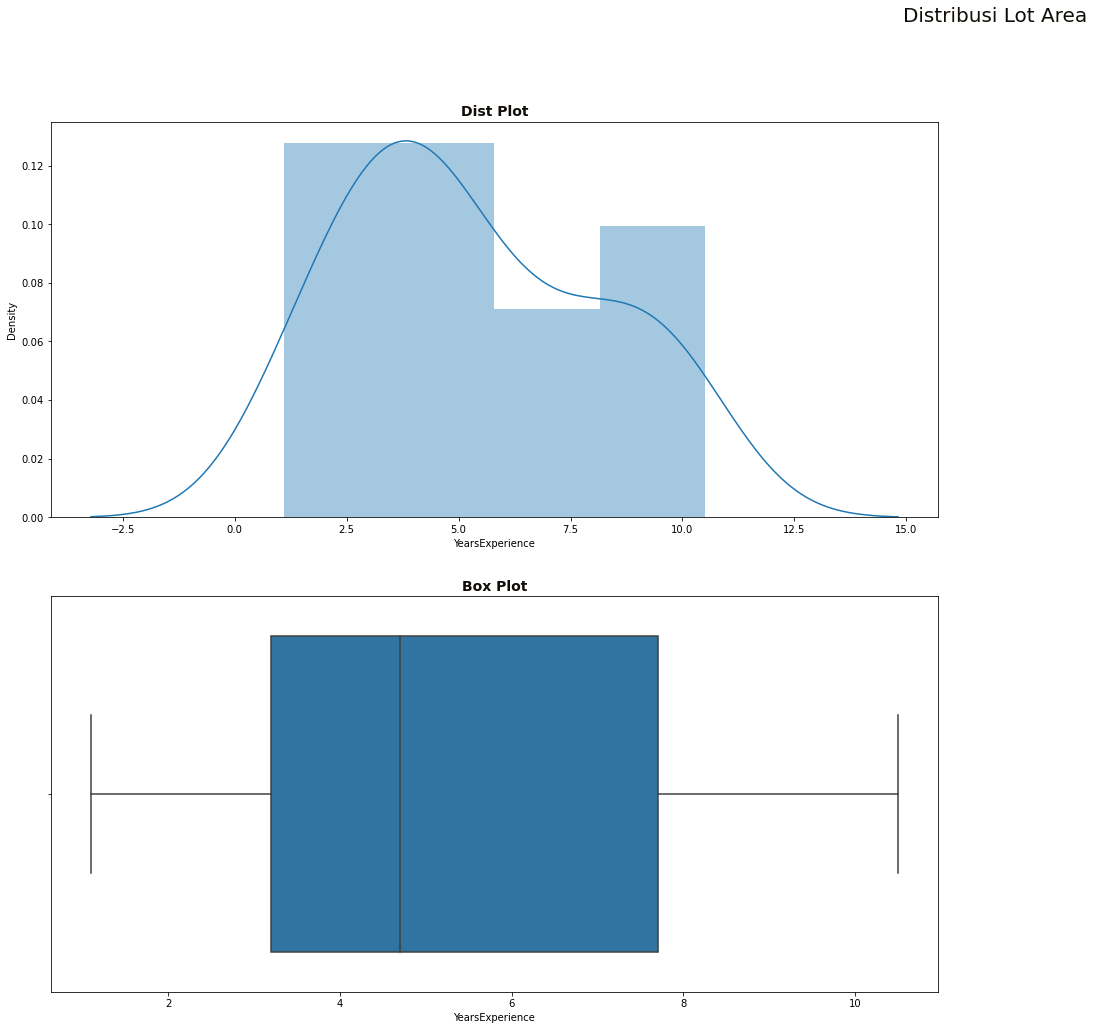

In [7]:
plt.figure(figsize=(35, 16))
plt.suptitle('Distribusi Lot Area',fontsize='20', color='#100C07')

plt.subplot(2, 2, 1)
plt.title('Dist Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.distplot(df['YearsExperience'])

plt.subplot(2, 2, 3)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.boxplot(df['YearsExperience'])

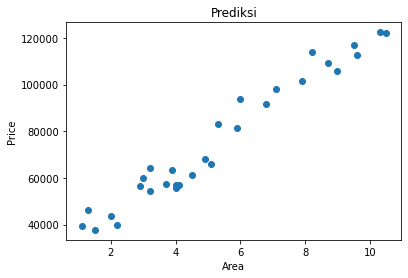

In [8]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Prediksi')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
regression = LinearRegression()

In [12]:
regression.fit(x,y)

LinearRegression()

In [13]:
y_pred = regression.predict(x)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [15]:
coef = regression.coef_
inter = regression.intercept_
print('Coefficients: \n', coef)
print('Intercept: \n', inter)
print("Mean squared error: %.2f"
% mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [9449.96232146]
Intercept: 
 25792.200198668717
Mean squared error: 31270951.72
Variance score: 0.96


In [16]:
coba = (x*coef) + inter
coba

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

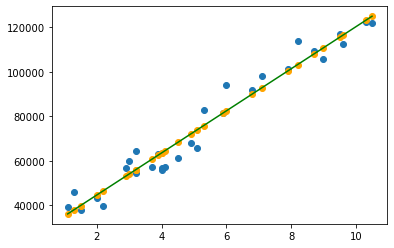

In [17]:
fig, ax = plt.subplots()

y_reg = x *coef + inter
ax.scatter(x, y)
ax.scatter(x, y_pred, color="orange")
ax.plot(x, y_reg, color="green")